In [1]:
from data_processing import *
from evaluation import *
from model import *



Using TensorFlow backend.


In [2]:
filename = "Copy of Buyout_Funds_Stats_2014.xlsx"
dat_all = get_macro(filename, "All")

filename = "Copy of Buyout_Funds_Stats_2014.xlsx"
#macro factors
dat_ISMmanu = get_macro(filename, "ISMmanu")
dat_GDP = get_macro(filename, "GDP")
dat_unemployment = get_macro(filename, "unemployment")
ppi = get_macro(filename,"PPI")
ISMnonmanu = get_macro(filename,"ISMnon-manu")
nfp = get_macro(filename,"NFP")
ppi_m = get_macro(filename,"core PPI m_m")
ppi_y = get_macro(filename,"core PPI year")
retail = get_macro(filename,"retail index")
core_retail = get_macro(filename,"core retail index")
consumer_m = get_macro(filename,"consumer product index m_m")
cpi_m = get_macro(filename,"core CPI m_m")
cpi_y = get_macro(filename,"core CPI year")
new_house = get_macro(filename,"New Housing")
consumer_sentiment = get_macro(filename,"Michigan Consumer Sentiment Ind")
sale_house = get_macro(filename,"House sales")
dgo = get_macro(filename,"Durable Goods Orders m_m")
dgo_et = get_macro(filename,"DGO m_m exclude transportation")
CCI = get_macro(filename,"Conference Board's CCI")
ir = get_macro(filename,"interest rate")

dataset3  = pd.concat([dat_all, dat_unemployment, dat_ISMmanu, dat_GDP, ppi,
                     ISMnonmanu, nfp, ppi_m, ppi_y, retail, core_retail, consumer_m,
                       cpi_y, new_house, consumer_sentiment, 
                      sale_house, dgo, dgo_et, CCI, ir
                    ],axis = 1)

/Users/aruba/Desktop/如果能这学期在美国找到工作就太好了(*≧∪≦)/Deep Learning/Final Project/code/data_processing.py:86: RuntimeWarning: divide by zero encountered in log
  log_data = np.log(data).diff().dropna()
/Users/aruba/Desktop/如果能这学期在美国找到工作就太好了(*≧∪≦)/Deep Learning/Final Project/code/data_processing.py:39: RuntimeWarning: invalid value encountered in double_scalars
  k = data.iloc[i, :].values[0] + j * step + np.random.normal(loc=0.0,


In [3]:
X = trans_dat(Pca(dataset3,9))
y = prep_dat(dat_all)['Q_Next']
X_train, X_test = split_dataset_x(X)
y_train, y_test = split_dataset_y(y)
# global n_steps, n_length
# n_steps = 3
# n_length = 90


total explained variance for 9 components is 0.9917362754521234


Train set MSE is 1.462991911409592e-05
Test set MSE is 0.0011313913071939227


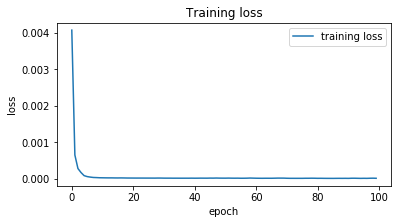

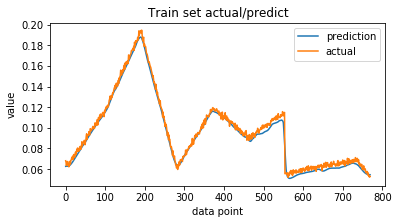

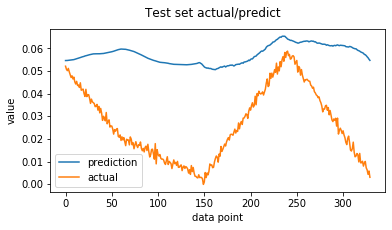

In [4]:
model_pca_con2 = build_model_conv2(X_train,y_train,270)
evaluation_model_conv(model_pca_con2,X_train,X_test,y_train,y_test)